In [1]:
%load_ext autoreload

In [2]:
%autoreload 2

In [75]:
from src.shape import Point, shape_to_projection, make_circle, translate_by_theta_r, get_union_shape
from src.shape import bbox_to_mesh, draw_shape, shift_array, calc_intensity_matrix
import numpy as np
import rasterio
from rasterio.features import geometry_mask

In [ ]:
geometry_mask()

In [ ]:
c = make_circle(0, 0, 0.2)

In [ ]:
xx = np.linspace(-180, 180)
yy = cosine_dist(xx, 200)
plt.plot(xx, yy)

In [ ]:
shift = translate_by_theta_r(c, 10, 0.1)

In [ ]:
new = shape_to_projection(c, 0.1, 45, 10, 2.5)
union = get_union_shape(c, 0.1, 10, 2.5)

In [ ]:
import matplotlib.pyplot as plt
c = make_circle(0, 0, 0.1)
new = shape_to_projection(c, 0.2, 45, 10, 2.5)
union = get_union_shape(c, 0.2, 10, 2.5)
x,y = c.exterior.xy
plt.plot(x, y, 'b-')
x,y = new.exterior.xy
plt.plot(x, y, 'r-')
x,y = union.exterior.xy
plt.plot(x, y, 'k-')
x,y = union.interiors[0].coords.xy
plt.plot(x, y, 'k-')
plt.xlabel("X (μm)")
plt.ylabel("Y (μm)")

In [ ]:
from src.shape import draw_shape

In [ ]:
draw_shape(ax, union)

In [ ]:
fig.canvas.draw()

In [ ]:
from shapely.shapely import 

In [ ]:
fig.savefig("test.png")

/Users/ttian/miniforge3/envs/nanolitho/lib/python3.10/site-packages/shapely/set_operations.py:133: RuntimeWarning: invalid value encountered in intersection
  return lib.intersection(a, b, **kwargs)
/Users/ttian/miniforge3/envs/nanolitho/lib/python3.10/site-packages/shapely/set_operations.py:340: RuntimeWarning: invalid value encountered in union
  return lib.union(a, b, **kwargs)
/Users/ttian/Documents/Dev/nanolitho/src/shape.py:99: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  exterior_patch = patches.Polygon(np.column_stack(shape.exterior.xy),
/Users/ttian/Documents/Dev/nanolitho/src/shape.py:108: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  interior_patch = patches.Polygon(np.column_stack(interior.xy),


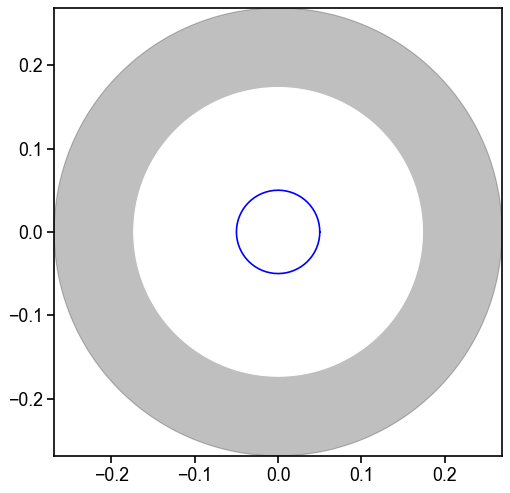

In [4]:
import matplotlib.pyplot as plt
from src.shape import draw_shape, cosine_dist, gauss_angle_dist
c = make_circle(0, 0, 0.05)
x,y = c.exterior.xy
plt.plot(x, y, 'b-')
# for angle in np.linspace(0, 20, 50):
arrs = []
xx, yy = np.meshgrid(np.linspace(-0.5, 0.5, 128), np.linspace(-0.5, 0.5, 128))
union = get_union_shape(c, 0.05, -5, 2.5)
draw_shape(plt.gca(), union)
sums = np.sum(arrs, axis=0)
# plt.xlabel("X (μm)")
# plt.ylabel("Y (μm)")
# # plt.imshow(sums)
# # plt.gcf().canvas.draw()
# plt.show()

In [49]:
def shift_array(z, xx, yy, xs, ys):
    """Shifts a 2D array over a grid by a specified x and y offset.

    Args:
    z: 2D array.
    xx: x coordinates.
    yy: y coordinates.
    xs: x offset.
    ys: y offset.

    Returns:
    Shifted 2D array.
    """
    # Compute shift in terms of grid indices
    dx = int(round(xs / (xx[0, 1] - xx[0, 0])))
    dy = int(round(ys / (yy[1, 0] - yy[0, 0])))
    print(dx, dy)

    # Create a new array filled with zeros
    z_shifted = np.zeros_like(z)

    # Shift the array
    if dx >= 0 and dy >= 0:
        z_shifted[dy:, dx:] = z[:-dy or None, :-dx or None]
    elif dx >= 0 and dy < 0:
        z_shifted[dy:, :dx] = z[:-dy or None, -dx:]
    elif dx < 0 and dy >= 0:
        z_shifted[:dy, dx:] = z[-dy:, :-dx or None]
    else: # dx < 0 and dy < 0
        z_shifted[:dy, :dx] = z[-dy:, -dx:]

    return z_shifted

In [223]:
def plot_ring(diameter, spacing, H=2.5, sigma=0.5, delta=0, repeat=5):
    import matplotlib.pyplot as plt
    plt.figure(figsize=(8, 8))
    from src.shape import draw_shape, cosine_dist, gauss_angle_dist
    # for angle in np.linspace(0, 20, 50):
    arrs = []
    c0 = make_circle(0, 0, diameter / 2)
    amin, amax = -spacing * 2, spacing * (repeat + 2)
    xx, yy = np.meshgrid(np.linspace(amin, amax, 2000), np.linspace(amin, amax, 2000))
    zz = np.zeros_like(xx)
    for angle in np.linspace(-5, 5, 50):
        angle0 = 5
        union = get_union_shape(c0, 0.1, angle0 + angle, H, steps=100, delta=delta)
        arr = calc_intensity_matrix(union, gauss_angle_dist(angle, sigma), xx, yy)
        zz += arr
    zz_origin = np.copy(zz)
    # zz2 = shift_array(zz_origin, xx, yy, 0.3, 0)
    xs = spacing
    ys = spacing
    sums = np.zeros_like(zz_origin)
    for nx in range(repeat + 1):
        for ny in range(repeat + 1):
            c = make_circle(spacing * nx, spacing * ny, diameter / 2)
            x,y = c.exterior.xy
            plt.plot(x, y, 'w--')
            sums += shift_array(zz_origin, xx, yy, xs * nx, ys * ny)
#     zz += shift_array(zz_origin, xx, yy, xs * 2, 0)
#     zz += shift_array(zz_origin, xx, yy, xs * 3, 0)
#     zz += shift_array(zz_origin, xx, yy, xs * 4, 0)
#     zz += shift_array(zz_origin, xx, yy, 0., ys)
#     zz += shift_array(zz_origin, xx, yy, xs, ys)
#     zz += shift_array(zz_origin, xx, yy, xs * 2, ys)
#     zz += shift_array(zz_origin, xx, yy, xs * 3, ys)
#     zz += shift_array(zz_origin, xx, yy, xs * 4, ys)
#     zz += shift_array(zz_origin, xx, yy, 0, ys * 2)
#     zz += shift_array(zz_origin, xx, yy, xs, ys * 2)
#     zz += shift_array(zz_origin, xx, yy, xs * 2, ys * 2)
#     zz += shift_array(zz_origin, xx, yy, xs * 3, ys * 2)
#     zz += shift_array(zz_origin, xx, yy, xs * 4, ys * 2)
#     zz += shift_array(zz_origin, xx, yy, 0, ys * 3)
#     zz += shift_array(zz_origin, xx, yy, xs, ys * 3)
#     zz += shift_array(zz_origin, xx, yy, xs * 2, ys * 3)
#     zz += shift_array(zz_origin, xx, yy, xs * 3, ys * 3)
#     zz += shift_array(zz_origin, xx, yy, xs * 4, ys * 3)
    plt.xlim(-0.5 * spacing, spacing * (repeat + 0.5))
    plt.ylim(-0.5 * spacing, spacing * (repeat + 0.5))
    plt.xlabel("X (μm)")
    plt.ylabel("Y (μm)")
    plt.imshow(sums, extent=[amin, amax, amin, amax], origin="lower")
    plt.savefig(f"{diameter * 1000:0f}nm-{spacing * 1000:0f}nm-sigma-{sigma:.2f}-shift-{delta * 1000:.2f}nm.pdf")
# plt.imshow(zz2, extent=[-1, 1, -1, 1], origin="lower")
# # plt.imshow(sums)
# # plt.gcf().canvas.draw()
# plt.show()

/Users/ttian/miniforge3/envs/nanolitho/lib/python3.10/site-packages/shapely/set_operations.py:133: RuntimeWarning: invalid value encountered in intersection
  return lib.intersection(a, b, **kwargs)
/Users/ttian/miniforge3/envs/nanolitho/lib/python3.10/site-packages/shapely/set_operations.py:340: RuntimeWarning: invalid value encountered in union
  return lib.union(a, b, **kwargs)


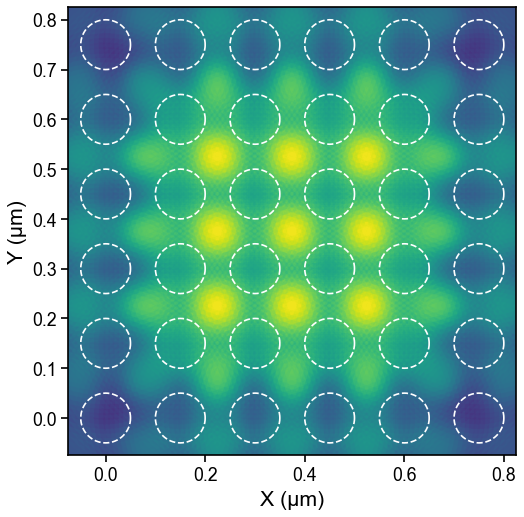

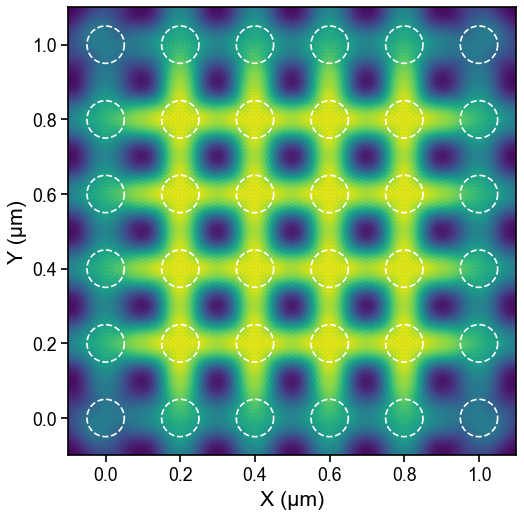

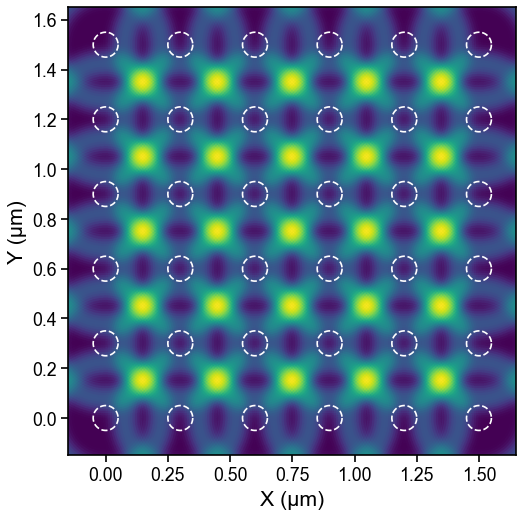

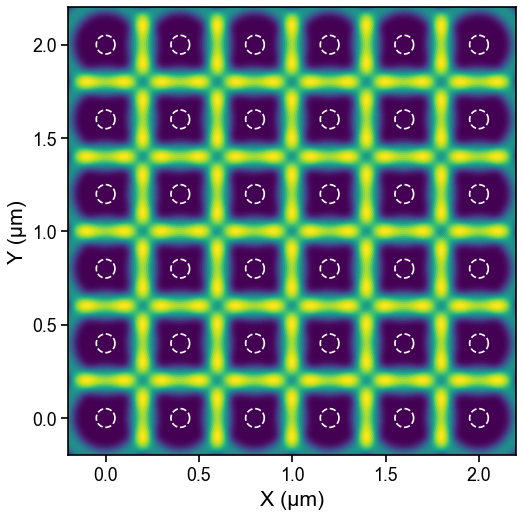

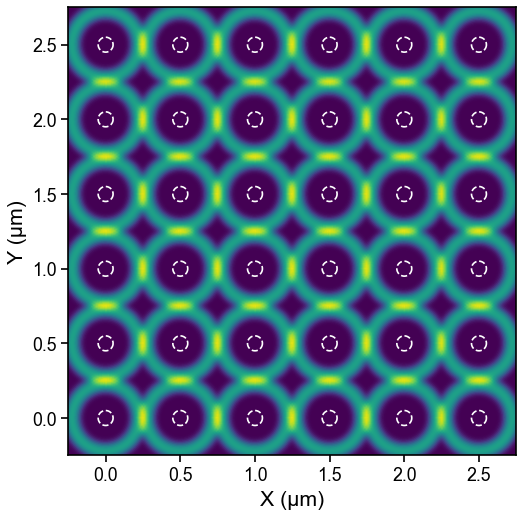

In [224]:
for spacing in (0.15, 0.2, 0.3, 0.4, 0.5):
    plot_ring(diameter=0.1, spacing=spacing, H=2.5, sigma=0.5, delta=0, repeat=5)

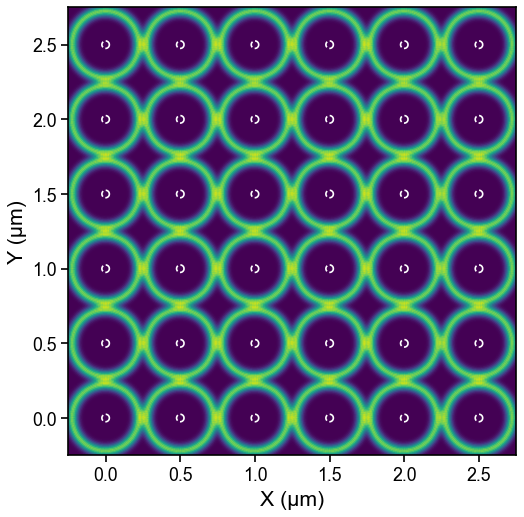

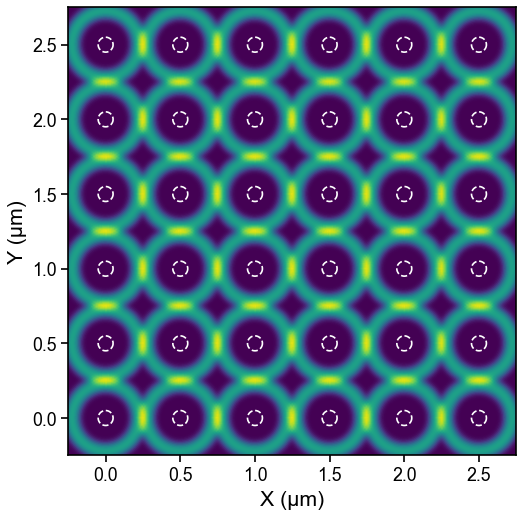

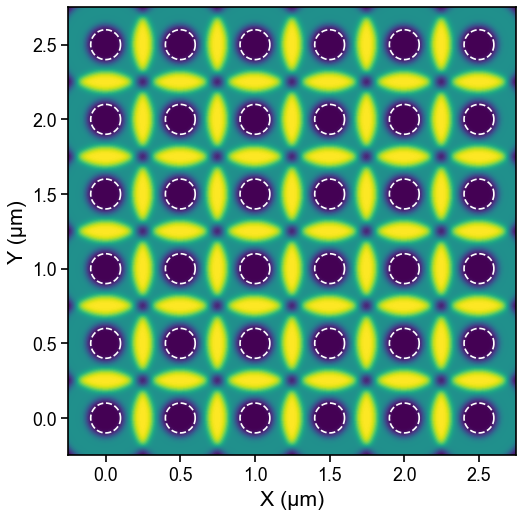

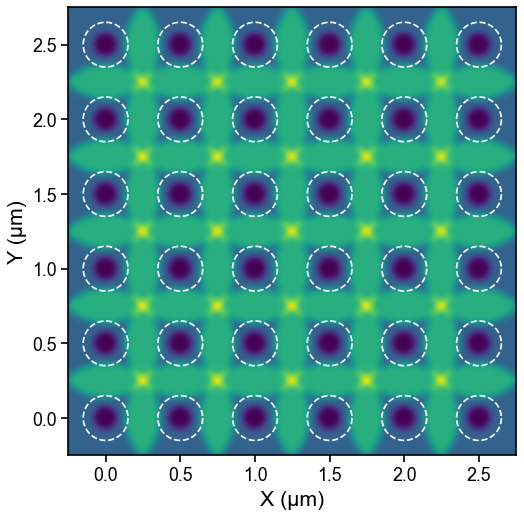

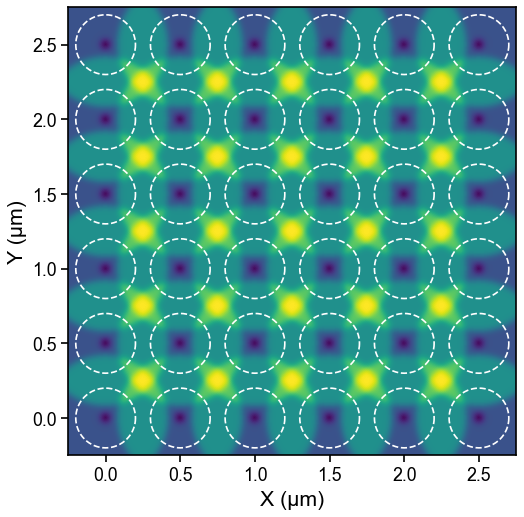

In [225]:
for dia in (0.05, 0.1, 0.2, 0.3, 0.4):
    plot_ring(diameter=dia, spacing=0.5, H=2.5, sigma=0.5, delta=0, repeat=5)

/Users/ttian/miniforge3/envs/nanolitho/lib/python3.10/site-packages/shapely/set_operations.py:340: RuntimeWarning: divide by zero encountered in union
  return lib.union(a, b, **kwargs)


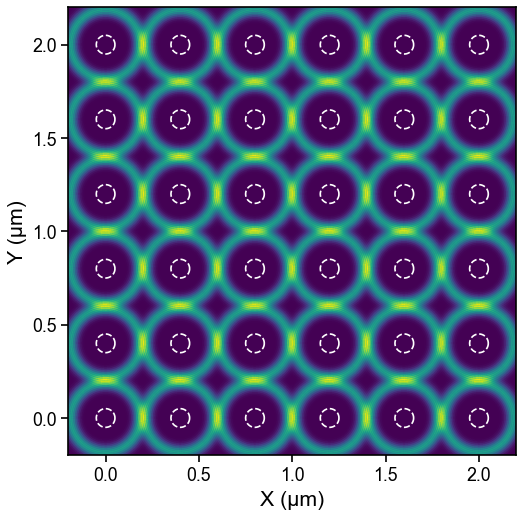

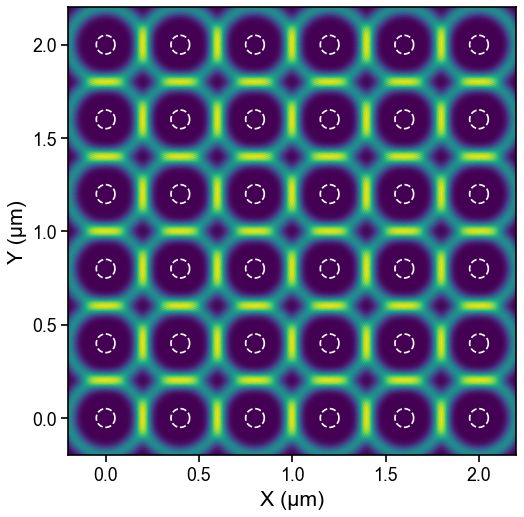

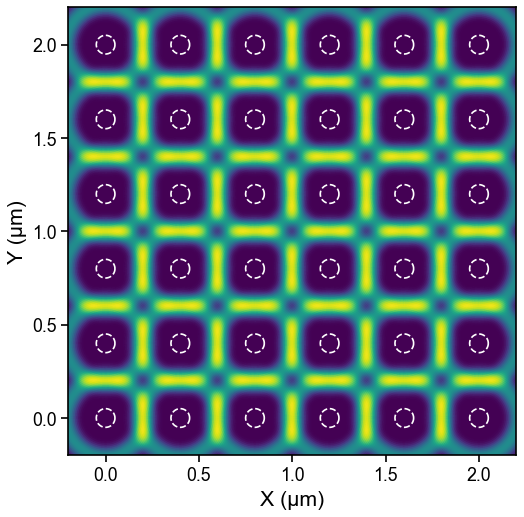

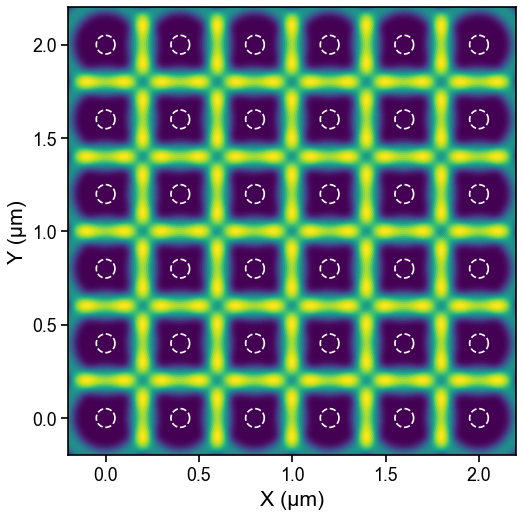

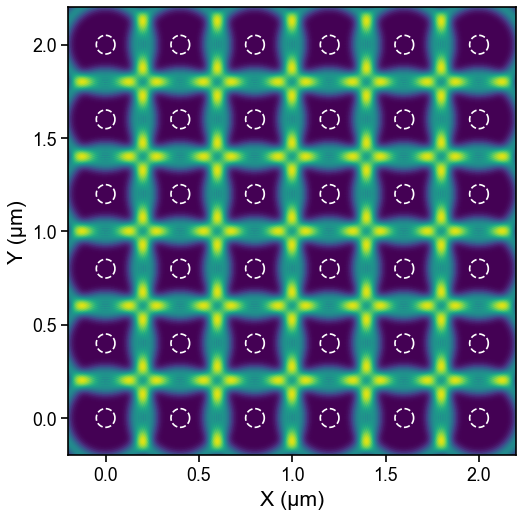

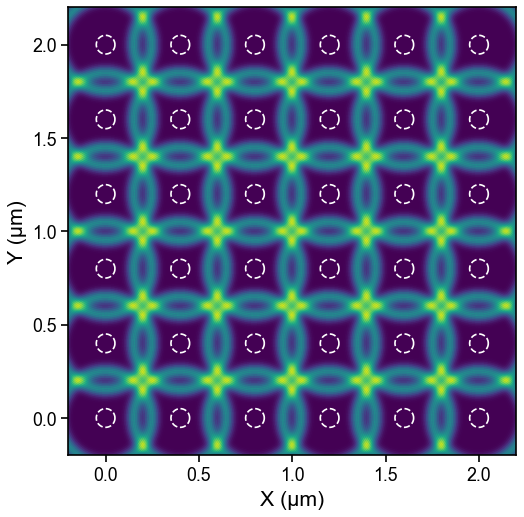

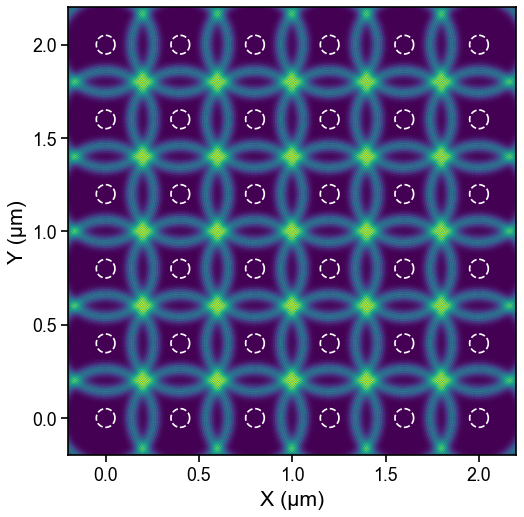

In [227]:
for delta in (-0.075, -0.05, -0.025, 0, 0.025, 0.05, 0.075):
    plot_ring(diameter=0.1, spacing=0.4, H=2.5, sigma=0.5, delta=delta, repeat=5)

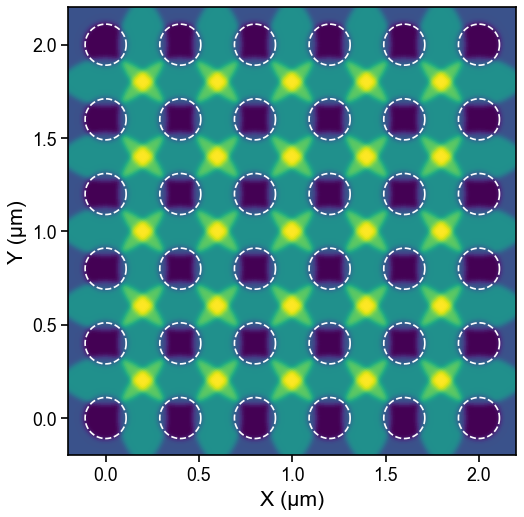

In [287]:
plot_ring(diameter=0.22, spacing=0.4, H=2.5, sigma=0.3, delta=0.0, repeat=5)

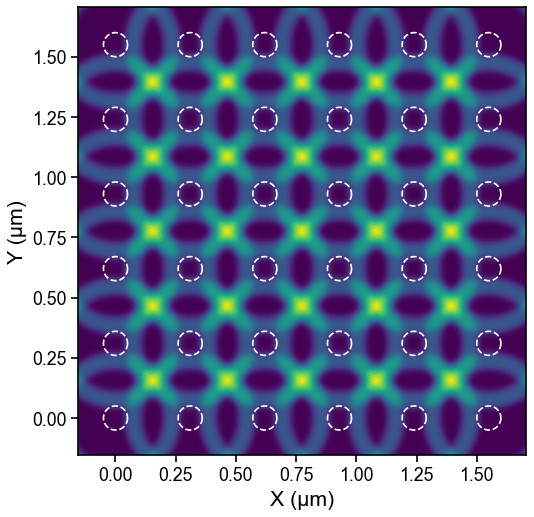

In [312]:
plot_ring(diameter=0.1, spacing=0.31, H=2.5, sigma=0.3, delta=0.025, repeat=5)

In [204]:
xx_l, yy_l = np.meshgrid(np.linspace(-0.5, 5, 2000), np.linspace(-0.5, 5, 2000))
points = np.array([xx.ravel(), yy.ravel()]).T
values = zz_origin.ravel()
grid_points = np.array([xx_l.flatten(), yy_l.flatten()]).T
values_large = griddata(points, values, grid_points, method='cubic')

KeyboardInterrupt: 

In [153]:
zz2 = shift_array(zz_origin, xx, yy, 0.3, 0)

205 0


In [154]:
yy[1, 0], yy[0, 1]

(-0.49853372434017595, -0.5)

In [ ]:
from scipy import interpolate

In [ ]:
xxx, yyy = np.meshgrid(np.linspace(-1, 1, 512), np.linspace(-1, 1, 512))


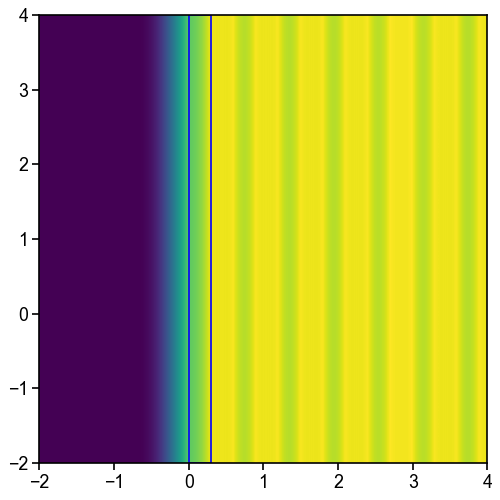

In [341]:
import matplotlib.pyplot as plt
from src.shape import draw_shape, cosine_dist
from shapely import Polygon

c = Polygon([(0, -2), (0.3, -2), (0.3, 4), (0, 4)])
x,y = c.exterior.xy
plt.plot(x, y, 'b-')
# for angle in np.linspace(0, 20, 50):

plt.gca().set_aspect("equal")
# plt.xlim(-5, 5)
# plt.ylim(-5, 5)
angle = 5

xx, yy = np.meshgrid(np.linspace(-2, 4, 1000), np.linspace(-2, 4, 1000))
zz = np.zeros_like(xx)
for angle in np.linspace(-10, 10, 256):
    angle0 = 5
    union = get_union_shape(c, 0.1, angle0 + angle, 2.5, steps=180, delta=0)
    arr = calc_intensity_matrix(union, gauss_angle_dist(angle, 4.3), xx, yy)
    zz += arr
zz_origin = np.copy(zz)
# zz2 = shift_array(zz_origin, xx, yy, 0.3, 0)
xs = 0.60
ys = 0.60
zz += shift_array(zz_origin, xx, yy, xs, 0)
zz += shift_array(zz_origin, xx, yy, xs * 2, 0)
zz += shift_array(zz_origin, xx, yy, xs * 3, 0)
zz += shift_array(zz_origin, xx, yy, xs * 4, 0)
zz += shift_array(zz_origin, xx, yy, xs * 5, 0)
zz += shift_array(zz_origin, xx, yy, xs * 6, 0)
zz += shift_array(zz_origin, xx, yy, xs * 7, 0)
zz += shift_array(zz_origin, xx, yy, xs * 8, 0)
sums = zz
# plt.xlabel("X (μm)")
# plt.ylabel("Y (μm)")
plt.imshow(sums, extent=[-2, 4, -2, 4], origin="lower")

# draw_shape(plt.gca(), union, alpha=0.25 * cosine_dist(angle, 25))

In [342]:
cond = np.where((xx > 0) & (xx < 4) & (yy >0) & (yy < 0.008))
xx_line, zz_line = xx[cond], zz[cond]

Text(0, 0.5, 'Abstract count')

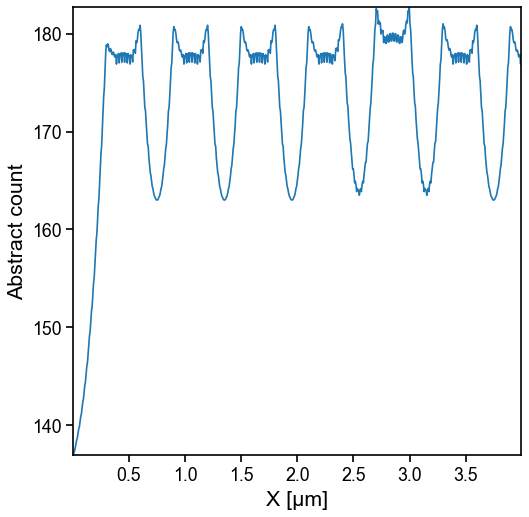

In [343]:
xx_line.shape
plt.plot(xx_line, zz_line)
plt.xlabel("X [μm]")
plt.ylabel("Abstract count")

In [344]:
%timeit union.contains(Point(0.0, 0.0))

7.74 µs ± 57.5 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


In [ ]:
union.bounds

In [5]:
from shapely.vectorized import contains
import numba
from shapely import simplify


def calc_intensity_matrix(shape, intensity, xmesh, ymesh):
    """Calculates an intensity matrix for a shape over a grid."""
    # Create a grid of points within the bbox
    bbox = shape.bounds
    mask = np.zeros_like(xmesh, dtype=bool)
    
    # Find the indices of the points within the bbox
    within_bbox_indices = ((xmesh >= bbox[0]) & (xmesh <= bbox[2]) & (ymesh >= bbox[1]) & (ymesh <= bbox[3]))
    # Only consider points within the bbox for contains calculation
    x_within_bbox = xmesh[within_bbox_indices]
    y_within_bbox = ymesh[within_bbox_indices]

    # Create a binary mask of the shape over the grid
    mask[within_bbox_indices] = contains(shape, x_within_bbox, y_within_bbox)
    
    
    # Multiply the mask by the intensity to obtain an intensity matrix
    intensity_matrix = mask * intensity

    return intensity_matrix

In [ ]:
%timeit matrix = calc_intensity_matrix(union, 1, xx, yy)

In [ ]:
bbox = [-5, -5, 5, 5]
xsamples, ysamples = 1024, 1024
x_vals = np.linspace(bbox[0], bbox[2], xsamples)
y_vals = np.linspace(bbox[1], bbox[3], ysamples)
xx, yy = np.meshgrid(x_vals, y_vals)


In [ ]:
from PIL import Image, ImageDraw

In [ ]:

from shapely.vectorized import contains
from shapely import Polygon

In [ ]:
x, y = union.interiors[0].coords.xy

In [ ]:
plt.imshow(matrix)

In [ ]:
%%time
pol = Polygon(union.exterior.coords)
contains(pol, xx, yy)

In [ ]:
union2 = prep(union)
%timeit calc_intensity_matrix(union2, 1, (-5, -5, 5, 5), 1024, 1024)

In [ ]:
array = calc_intensity_matrix(union, 1, (-5, -5, 5, 5), 1024, 1024)
# array2 = calc_intensity_matrix(union2, 0.8, (-5, -5, 5, 5), 1024, 1024)

In [ ]:
plt.imshow(array + array2)